# Predicting Heart Disease using Machine Learning

###  Import our tools and set background of plots to black (looks cooler)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, recall_score, plot_roc_curve, plot_confusion_matrix
plt.style.use('dark_background')

### Read file and view contents

In [2]:
df=pd.read_csv(r'C:\Users\Ali Imran\Desktop\NOWA\scikit-learn-data\heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## How many have heart disease and how many don't

In [3]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

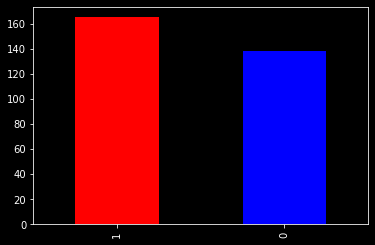

In [4]:
df['target'].value_counts().plot(kind='bar', color=['red', 'blue'])

## Classification based on sex

In [5]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

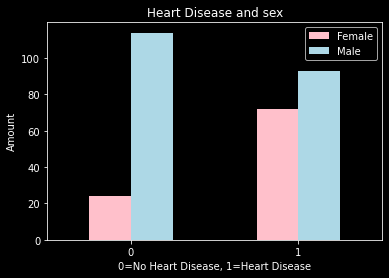

In [6]:
#Heart Disease and Sex
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   color=['pink','lightblue'])
plt.title('Heart Disease and sex')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)

## Heart Disease relation with age

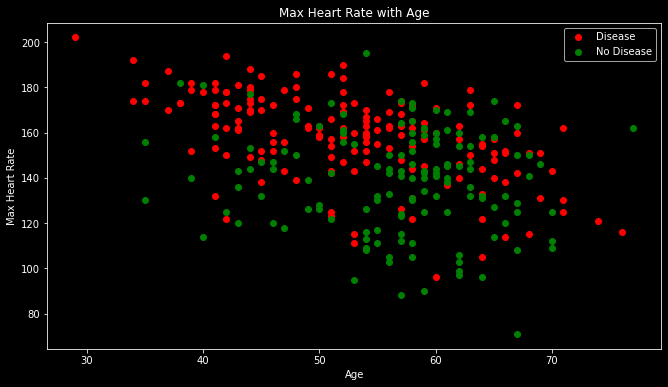

In [7]:
#Relation between Age and Max Heart Rate of people with Heart Disease
fig=plt.figure(figsize=(11,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c='red')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c='green')
plt.title('Max Heart Rate with Age')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])


<AxesSubplot:title={'center':'Age Histogram'}, ylabel='Frequency'>

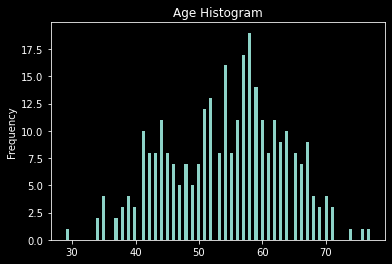

In [8]:
df.age.plot.hist(bins=100,
                title='Age Histogram')

## Analyzing Chest Pain

In [9]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


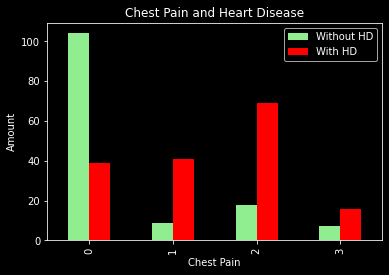

In [10]:
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['lightgreen','red'])
plt.title('Chest Pain and Heart Disease')
plt.xlabel('Chest Pain')
plt.ylabel('Amount')
plt.legend(['Without HD','With HD'])


## View Correlation using Correlation Matrix

<AxesSubplot:>

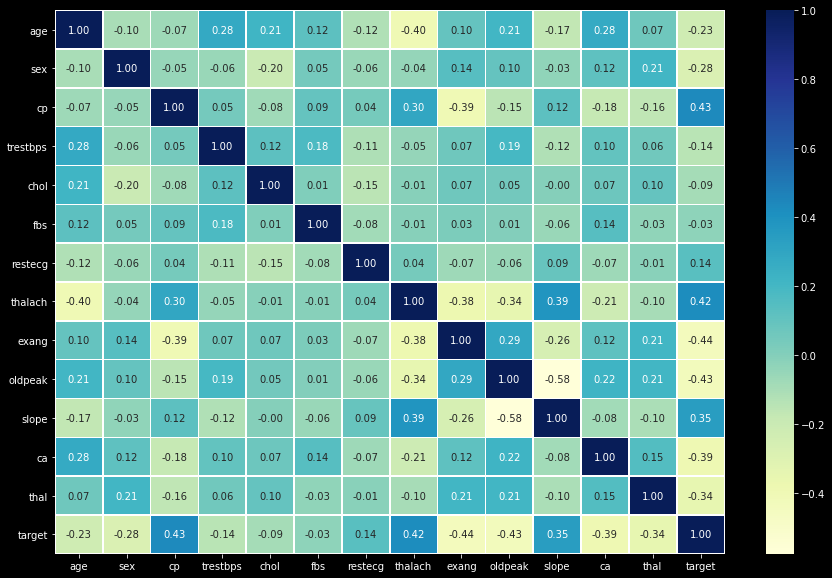

In [11]:
import seaborn as sns
corrm=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
sns.heatmap(corrm,
           annot=True,
           linewidth=0.6,
           fmt='.2f',
           cmap='YlGnBu')



## Starting Machine Learning

In [12]:
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y)
X.shape,y.shape

((303, 13), (303,))

### Fit and Score the 3 models: 
#### Logistic Regression
#### KNN
#### Random Forest Classifier

In [13]:
models={'Logistic Reg':LogisticRegression(),
       'KNN':KNeighborsClassifier(),
       'Random Forest': RandomForestClassifier()}
def fit_score (models,X_train,X_test,y_train,y_test):

    np.random.seed(55)
    res={}
    for name, model in models.items():
        print('fitting',name,'...')
        model.fit(X_train,y_train)
        print('scoring',name,'...')
        s=model.score(X_test,y_test)
        res[name]=s
    print(res)
    return (res)

scores=fit_score(models,X_train,X_test,y_train,y_test)

scores     
        

fitting Logistic Reg ...
scoring Logistic Reg ...
fitting KNN ...
scoring KNN ...
fitting Random Forest ...
scoring Random Forest ...
{'Logistic Reg': 0.8421052631578947, 'KNN': 0.7105263157894737, 'Random Forest': 0.8421052631578947}


C:\Users\Ali Imran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Reg': 0.8421052631578947,
 'KNN': 0.7105263157894737,
 'Random Forest': 0.8421052631578947}

### Comparing the Models

<AxesSubplot:>

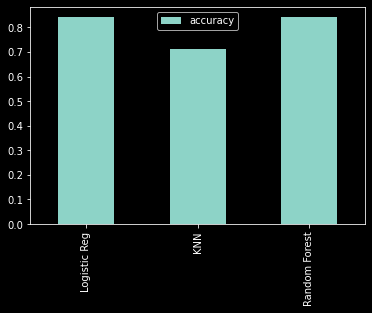

In [14]:
score_compare=pd.DataFrame(scores, index=['accuracy'])
score_compare.T.plot.bar()


### Using KNN and seeing if we can discard it

In [16]:
train_score,test_score=[],[]

knn=KNeighborsClassifier()


negh=range(1,120)


for n in negh:
    knn.set_params(n_neighbors=n)
        
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

        
print('max is',max(test_score))
              

max is 0.75


max KNN score is 75.00%


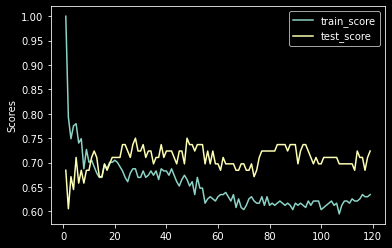

In [17]:
plt.plot(negh,train_score,label='train_score')
plt.plot(negh,test_score,label='test_score')
plt.xlabel=('Num of Neighbors')

plt.ylabel('Scores')
plt.legend()

mtr=max(test_score)

print(f'max KNN score is {mtr*100:.2f}%')


## Disregard KNN since score too low

In [19]:
lr_grid={"C":np.logspace(-4,4,20),
        'solver':['liblinear']}

rd_grid={'n_estimators':np.arange(0,2500,50),
        'max_depth':[None,3,10,20,50,100],
        'min_samples_split':np.arange(2,100,5),
        'min_samples_leaf':np.arange(2,100,5)}

## Fitting Logistic Regression and Random Forest

## Discard Random Forest as it takes too much time with less accuracy

In [22]:
#logisitc reg Random Search
np.random.seed(11)

rs_lr=RandomizedSearchCV(LogisticRegression(),
                        param_distributions=lr_grid,
                        cv=20,
                        n_iter=30,
                        verbose=True)
rs_lr.fit(X_train,y_train)

#RFC Random Search

np.random.seed(11)

rf_lr=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rd_grid,
                        cv=5,
                        
                        verbose=True)
rf_lr.fit(X_train,y_train)


C:\Users\Ali Imran\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 20 folds for each of 20 candidates, totalling 400 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 10, 20, 50, 100],
                                        'min_samples_leaf': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82,
       87, 92, 97]),
                                        'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82,
       87, 92, 97]),
                                        'n_estimators': array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600,
       1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150,
       2200, 2250, 2300, 2350, 2400, 2450])},
                   verbose=True)

In [25]:

rf_lr.best_params_
rf_lr.score(X_test,y_test)

rs_lr.best_params_
rs_lr.score(X_test,y_test)


0.8421052631578947

## Tuning Hyperparameters

### Random Forest Done though disgarded due to time

In [28]:
'''
np.random.seed(22)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rd_grid, 
                        cv=5,
                        n_iter=40,
                        verbose=True)
rs_rf.fit(X_train,y_train)
'''

'\nnp.random.seed(22)\n\nrs_rf=RandomizedSearchCV(RandomForestClassifier(),\n                        param_distributions=rd_grid, \n                        cv=5,\n                        n_iter=40,\n                        verbose=True)\nrs_rf.fit(X_train,y_train)\n'

In [29]:
#rs_rf.best_params_

In [30]:
#rs_rf.score(X_test,y_test)

## Logistic Reg tuned using GridSearchCV

In [31]:
log_grid={'C':np.logspace(-4,4,30),
         'solver':['liblinear']}

gs=GridSearchCV(LogisticRegression(),
               param_grid=log_grid,
               cv=10,
               verbose=True)

gs.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
gs.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [33]:
gs.score(X_test,y_test)

0.8289473684210527

## Plotting ROC curve

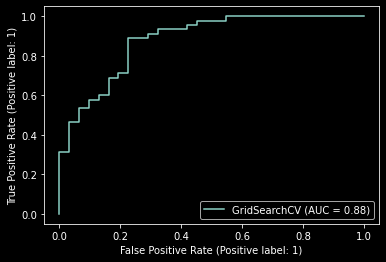

In [35]:
plot_roc_curve(gs,X_test,y_test)

## Plot Confusion Matrix

In [37]:
y_pred=gs.predict(X_test)

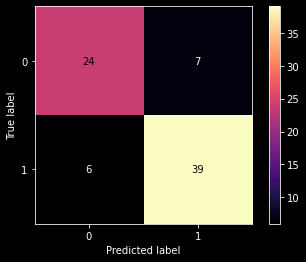

In [38]:
cm=confusion_matrix(y_test,y_pred)
cm
plot_confusion_matrix(gs,X_test,y_test,cmap='magma')

### Get Classification Report

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.85      0.87      0.86        45

    accuracy                           0.83        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



In [41]:
gs.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

## Evaluating Model based on different scores

In [42]:
clf=LogisticRegression(C= 0.20433597178569418, solver='liblinear')

In [43]:
#accuracy
clf_acc=cross_val_score(clf,
                       X,y,
                       cv=5,
                       scoring='accuracy')
acc=clf_acc.mean()
acc

0.8446994535519124

In [44]:
#precision

clf_pre=cross_val_score(clf,
                       X,y,
                       cv=5,
                       scoring='precision')
pre=clf_pre.mean()
pre


0.8207936507936507

In [45]:
clf_re=cross_val_score(clf,
                       X,y,
                       cv=5,
                       scoring='recall')
recall=clf_re.mean()
recall

0.9212121212121213

In [46]:
clf_f1=cross_val_score(clf,
                       X,y,
                       cv=5,
                       scoring='f1')
f1=clf_f1.mean()
f1

0.8673007976269721

### Plot all scores 

<AxesSubplot:title={'center':'Cross Verified Metrics'}>

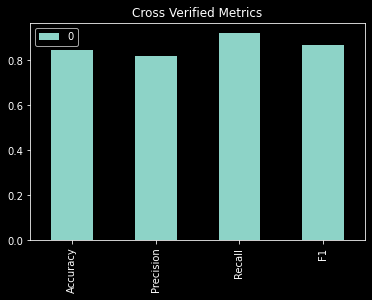

In [48]:
cv_metrics=pd.DataFrame({'Accuracy':acc,
                        'Precision':pre,
                        'Recall':recall,
                        'F1':f1},
                       index=[0])
cv_metrics.T.plot.bar(title='Cross Verified Metrics')

## Finding Most Important Features in Predicting Heart Disease 

In [54]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [55]:
clf.coef_

array([[ 1.60872394e-02, -8.17275889e-01,  7.58084156e-01,
        -1.99435792e-02,  6.00879667e-04, -2.38846618e-03,
         2.54531302e-01,  2.58811521e-02, -5.29174486e-01,
        -4.89715170e-01,  3.58129599e-01, -8.28168424e-01,
        -7.95311635e-01]])

In [56]:
featured=dict(zip(df.columns,list(clf.coef_[0])))
featured

{'age': 0.0160872393835177,
 'sex': -0.8172758891628926,
 'cp': 0.7580841557210997,
 'trestbps': -0.019943579203570105,
 'chol': 0.0006008796673331572,
 'fbs': -0.002388466179008823,
 'restecg': 0.25453130222758374,
 'thalach': 0.02588115207189893,
 'exang': -0.5291744855011303,
 'oldpeak': -0.4897151700039138,
 'slope': 0.35812959894616936,
 'ca': -0.8281684236493283,
 'thal': -0.7953116353230568}

<AxesSubplot:title={'center':'Feature Importance'}>

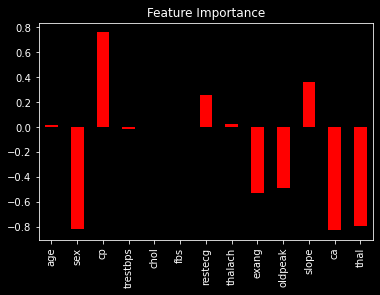

In [57]:
f_df=pd.DataFrame(featured,index=[0])
plt.style.use('dark_background')
f_df.T.plot.bar(title='Feature Importance',legend=False,color='red')



# 